# Loan Status Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

In [4]:
data=pd.read_csv('Loan Prediction train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Cleaning

In [7]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
data['Married']=data['Married'].fillna("No")
data['Married'].value_counts()

Yes    398
No     216
Name: Married, dtype: int64

In [9]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [10]:
data['Dependents']=data['Dependents'].fillna('0')
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
data['Self_Employed']=data['Self_Employed'].fillna('No')
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
data['Gender'].mode()

0    Male
dtype: object

In [15]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [16]:
data['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount'>

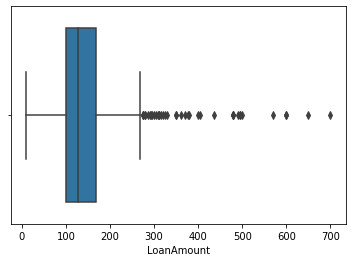

In [17]:
sbn.boxplot(x=data['LoanAmount'],data=data)

*Since Mean's value can be distorted by outliers, choosing median in this case would be a better solution since both values lie in density region*

In [18]:
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())
# data['LoanAmount'].unique()

In [19]:
data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [20]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

*Observing the above, it's better to replace na with median value which is also mode value*

In [21]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [23]:
data['Credit_History'].mode()[0]

1.0

In [24]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [25]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualisation

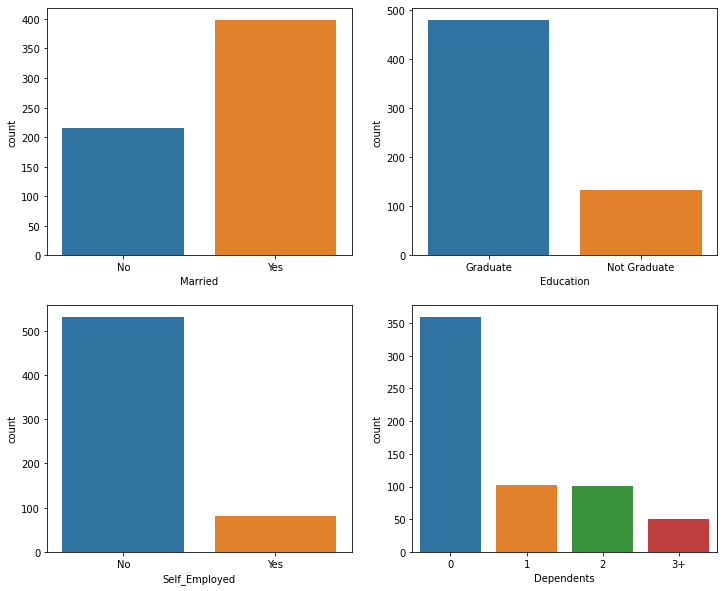

In [26]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
ax[0][0]=sbn.countplot(x=data['Married'],data=data,ax=ax[0][0])
ax[1][0]=sbn.countplot(x=data['Self_Employed'],data=data,ax=ax[1][0])
ax[0][1]=sbn.countplot(x=data['Education'],data=data,ax=ax[0][1])
ax[1][1]=sbn.countplot(x=data['Dependents'],data=data,ax=ax[1][1])

In [27]:
fig.savefig('Barplots.png')

**Checking for data imbalance**

In [28]:
# sbn.countplot(x=data['Loan_Status'],data=data)

In [29]:
data['Loan_Status'].count()

614

## Relation Analysis

In [30]:
df=data.copy()

In [31]:
df['Loan_Status']=df['Loan_Status'].replace('N',0)
df['Loan_Status']=df['Loan_Status'].replace('Y',1)

C:\Users\Shefali\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


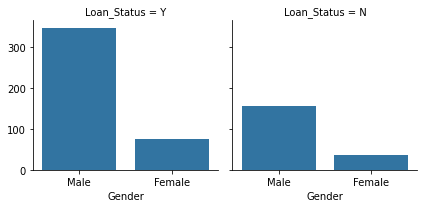

In [32]:
g=sbn.FacetGrid(data,col='Loan_Status')
g.map(sbn.countplot,'Gender')

In [33]:
df['Married']=df['Married'].replace('No','0')
df['Married']=df['Married'].replace('Yes','1')

In [34]:
df['Education']=df['Education'].replace('Graduate','0')
df['Education']=df['Education'].replace('Not Graduate','1')

In [35]:
df['Self_Employed']=df['Self_Employed'].replace('No','0')
df['Self_Employed']=df['Self_Employed'].replace('Yes','1')

In [36]:
dc=pd.melt(df,id_vars=['Loan_Status'],value_vars=['Married','Self_Employed','Education','Dependents'])
dc

,Loan_Status,variable,value
0,1,Married,0
1,0,Married,1
2,1,Married,1
3,1,Married,1
4,1,Married,0
...,...,...,...
2451,1,Dependents,0
2452,1,Dependents,3+
2453,1,Dependents,1
2454,1,Dependents,2


In [37]:
dc= pd.DataFrame(dc.groupby(['Loan_Status','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()
dc

,Loan_Status,variable,value,total
0,0,Dependents,0,113
1,0,Dependents,1,36
2,0,Dependents,2,25
3,0,Dependents,3+,18
4,0,Education,0,140
5,0,Education,1,52
6,0,Married,0,79
7,0,Married,1,113
8,0,Self_Employed,0,166
9,0,Self_Employed,1,26


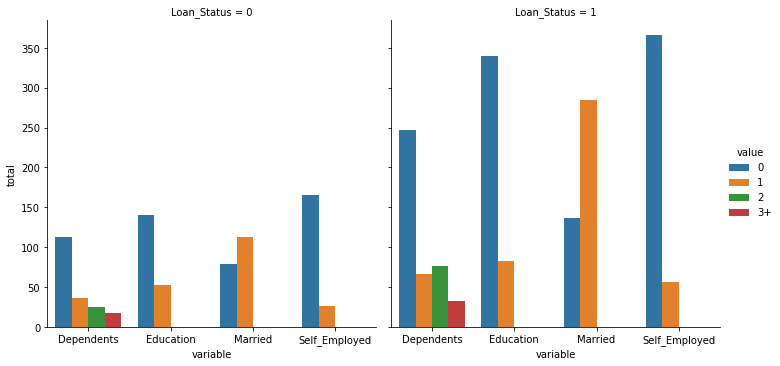

In [38]:
sbn.catplot(x='variable',y='total',hue='value',col='Loan_Status',kind='bar', data=dc)

In [40]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
